features=32,grid=10,depth=2 class=<class 'kan.KAN.KAN'>,time=0.20741486549377441,time_per_step=0.020741486549377443
features=32,grid=10,depth=2 class=<class 'fast_kan.KAN.KAN'>,time=0.053351402282714844,time_per_step=0.0053351402282714845
features=32,grid=10,depth=2 class=<class 'fast_kan.KAN.KAN'>,time=0.01810002326965332,time_per_step=0.001810002326965332
features=32,grid=10,depth=2 time scale=11.459370101558282
features=64,grid=10,depth=2 class=<class 'kan.KAN.KAN'>,time=0.04180502891540527,time_per_step=0.004180502891540527
features=64,grid=10,depth=2 class=<class 'fast_kan.KAN.KAN'>,time=0.03234386444091797,time_per_step=0.003234386444091797
features=64,grid=10,depth=2 class=<class 'fast_kan.KAN.KAN'>,time=0.029635190963745117,time_per_step=0.0029635190963745116
features=64,grid=10,depth=2 time scale=1.410654952976291
features=128,grid=10,depth=2 class=<class 'kan.KAN.KAN'>,time=0.04567575454711914,time_per_step=0.004567575454711914
features=128,grid=10,depth=2 class=<class 'fast_

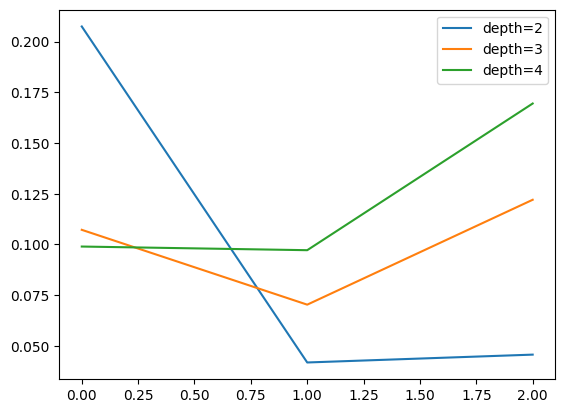

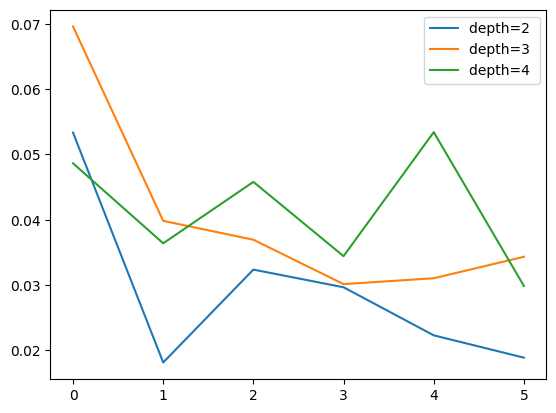

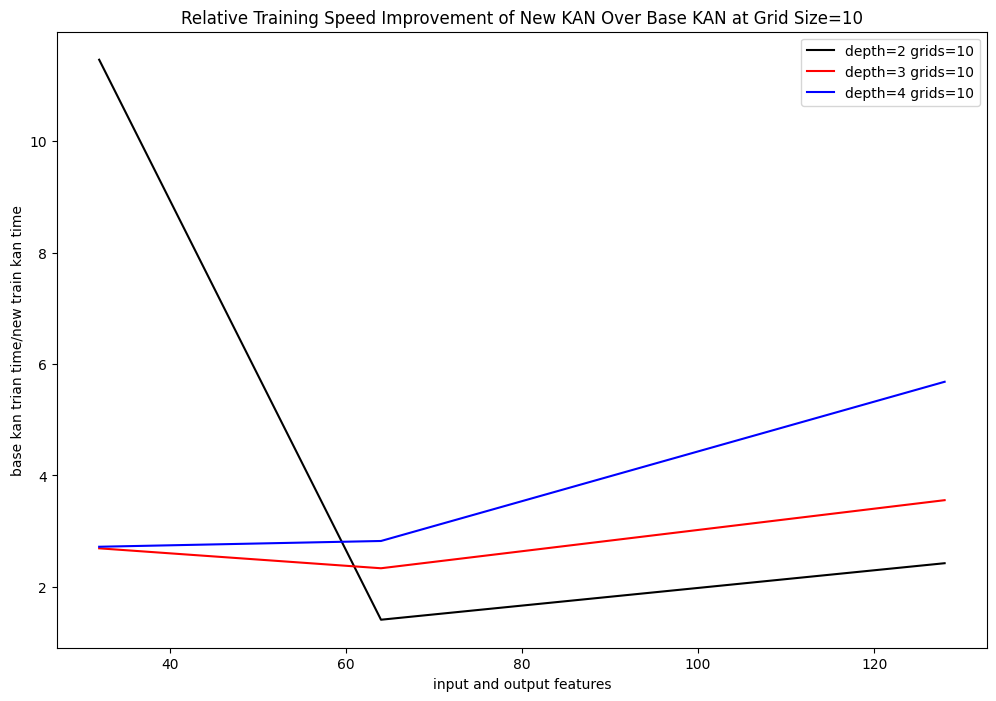

features=32,grid=20,depth=2 class=<class 'kan.KAN.KAN'>,time=0.034406423568725586,time_per_step=0.0034406423568725587
features=32,grid=20,depth=2 class=<class 'fast_kan.KAN.KAN'>,time=0.02321481704711914,time_per_step=0.002321481704711914
features=32,grid=20,depth=2 class=<class 'fast_kan.KAN.KAN'>,time=0.018670320510864258,time_per_step=0.0018670320510864257
features=32,grid=20,depth=2 time scale=1.8428405419555862
features=64,grid=20,depth=2 class=<class 'kan.KAN.KAN'>,time=0.03238844871520996,time_per_step=0.0032388448715209963
features=64,grid=20,depth=2 class=<class 'fast_kan.KAN.KAN'>,time=0.014111518859863281,time_per_step=0.0014111518859863282
features=64,grid=20,depth=2 class=<class 'fast_kan.KAN.KAN'>,time=0.012109518051147461,time_per_step=0.0012109518051147462
features=64,grid=20,depth=2 time scale=2.6746273946171564
features=128,grid=20,depth=2 class=<class 'kan.KAN.KAN'>,time=0.05800938606262207,time_per_step=0.005800938606262207
features=128,grid=20,depth=2 class=<class 

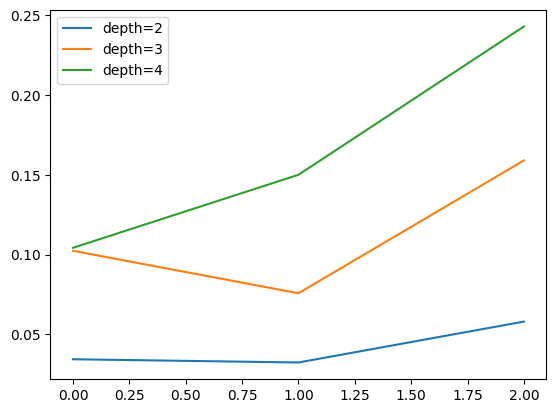

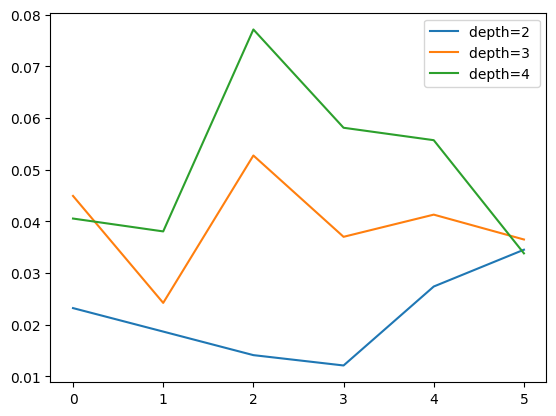

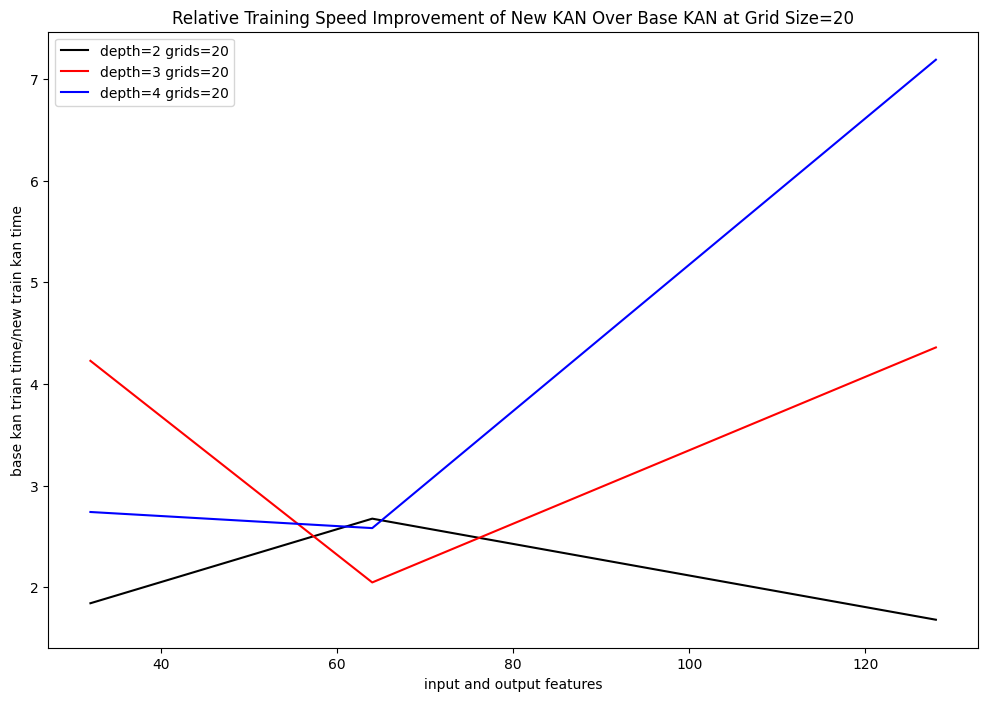

features=32,grid=50,depth=2 class=<class 'kan.KAN.KAN'>,time=0.03289294242858887,time_per_step=0.0032892942428588865
features=32,grid=50,depth=2 class=<class 'fast_kan.KAN.KAN'>,time=0.023709535598754883,time_per_step=0.0023709535598754883
features=32,grid=50,depth=2 class=<class 'fast_kan.KAN.KAN'>,time=0.01808905601501465,time_per_step=0.001808905601501465
features=32,grid=50,depth=2 time scale=1.8183891078277603
features=64,grid=50,depth=2 class=<class 'kan.KAN.KAN'>,time=0.0446014404296875,time_per_step=0.00446014404296875
features=64,grid=50,depth=2 class=<class 'fast_kan.KAN.KAN'>,time=0.024377822875976562,time_per_step=0.002437782287597656
features=64,grid=50,depth=2 class=<class 'fast_kan.KAN.KAN'>,time=0.02734541893005371,time_per_step=0.002734541893005371
features=64,grid=50,depth=2 time scale=1.6310388421465627
features=128,grid=50,depth=2 class=<class 'kan.KAN.KAN'>,time=0.10090994834899902,time_per_step=0.010090994834899902
features=128,grid=50,depth=2 class=<class 'fast_k

In [ ]:
from kan import KAN as BaseKAN
from kan import  create_dataset

from fast_kan import KAN as BetterKAN

import torch
import time
device='cuda' if torch.cuda.is_available() else 'cpu'
n=10
steps=10

depths=[2,3,4]
features_list=[32,64,128]
for grid in [10,20,50]:
    
   
    base_kan_time={}
    better_kan_time={}
    times_scales={}
    for depth in depths:
        
        base_kan_t=[]
        base_kan_time[f"depth={depth}"]=base_kan_t
        better_kan_t=[]
        better_kan_time[f"depth={depth} "]=better_kan_t
        time_scale=[]
        times_scales[f"depth={depth} grids={grid}"]=time_scale
        for features in features_list:
            
            dataset=create_dataset(f=lambda x:x,n_var=features,train_num=n,test_num=n,device=device)
        # for kan in [BaseKAN, BetterKAN]:
           
            try :
               
                base_kan=BaseKAN(width=[features]*depth,grid=grid,device=device,symbolic_enabled=False)
                # base_kan.train(dataset,opt="Adam",steps=steps,device=device,update_grid=False)
                opt=torch.optim.Adam(base_kan.parameters())
                criterion=torch.nn.MSELoss()
                t=time.time()
                for i in range(steps):
                    opt.zero_grad()
                    loss=criterion(base_kan(dataset["train_input"]),dataset["train_label"])
                    loss.backward()
                    opt.step()
                base_time=time.time()-t
                base_kan_t.append(time.time()-t)
                print(f"features={features},grid={grid},depth={depth} class={BaseKAN},time={time.time()-t},time_per_step={(time.time()-t)/steps}")
                
            except Exception as e:
                print(f"features={features},grid={grid},depth={depth} class={BaseKAN},error={e}")
                base_kan_t.append(float('nan'))
                base_time=float('nan')
            better_kan=BetterKAN(width=[features]*depth,num_basis=grid,device=device,symbolic_enabled=False).to(device)
            opt=torch.optim.Adam(better_kan.parameters())
            criterion=torch.nn.MSELoss()
            t=time.time()
            
            for i in range(steps):
                opt.zero_grad()
                loss=criterion(better_kan(dataset["train_input"]),dataset["train_label"])
                loss.backward()
                opt.step()
            better_time=time.time()-t
            better_kan_t.append(time.time()-t)
            
            print(f"features={features},grid={grid},depth={depth} class={BetterKAN},time={time.time()-t},time_per_step={(time.time()-t)/steps}")
            try:
                    
                
                better_kan=BetterKAN(width=[features]*depth,num_basis=grid,device=device,symbolic_enabled=False).to(device)
                opt=torch.optim.Adam(better_kan.parameters())
                criterion=torch.nn.MSELoss()
                t=time.time()
                
                for i in range(steps):
                    opt.zero_grad()
                    loss=criterion(better_kan(dataset["train_input"],save_acts=False,acts_has_grad=False),dataset["train_label"])
                    loss.backward()
                    opt.step()
                better_time=time.time()-t
                better_kan_t.append(time.time()-t)
               
                print(f"features={features},grid={grid},depth={depth} class={BetterKAN},time={time.time()-t},time_per_step={(time.time()-t)/steps}")
                
            except Exception as e:
                print(f"features={features},grid={grid},depth={depth} class={BetterKAN},error={e}")
                better_kan_t.append(float('nan'))
                better_time=float('nan')
            print(f"features={features},grid={grid},depth={depth} time scale={base_time/better_time}")
            time_scale.append(base_time/better_time)
    import matplotlib.pyplot as plt 
    # plt.figure()
    plt.figure()
    for k,v in base_kan_time.items():
        plt.plot(v,label=k)
        plt.legend()
    plt.legend()
    plt.figure()
    for k,v in better_kan_time.items():
        plt.plot(v,label=k)
        plt.legend()
    ax,plot=plt.subplots()
    ax.set_size_inches(12,8)
    plot.set_prop_cycle(color=['black', 'red', 'blue'])

    for k,v in times_scales.items():
        plt.plot(features_list,v,label=k)
        plt.legend()
    plot.set_title(f"Relative Training Speed Improvement of New KAN Over Base KAN at Grid Size={grid}")
    plot.set_xlabel("input and output features")
    plot.set_ylabel("base kan trian time/new train kan time")
    # plt.set_xlabel("depth")
    # plt.set_ylabel("time")
    plt.show()
